In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the fitness of each individual in the population
def cal_pop_fitness(equation_inputs, pop):
    # Fitness function calculates the sum of products between each input and its corresponding weight
    fitness = np.sum(pop * equation_inputs, axis=1)
    return fitness

In [3]:
# Function to select the mating pool (parents)
def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for the next generation
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999  # To ensure this parent is not selected again
    return parents

In [4]:
# Function for crossover operation
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)  # The point where crossover happens

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]  # First parent index
        parent2_idx = (k + 1) % parents.shape[0]  # Second parent index

        # The offspring will have its first half from the first parent and the second half from the second parent
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    
    return offspring

In [5]:
# Function for mutation operation
def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    
    # Apply mutations to the offspring
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            random_value = np.random.uniform(-1.0, 1.0, 1)  # Generate random mutation value
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx += mutations_counter
    
    return offspring_crossover

In [6]:
# Define the equation inputs and number of weights
equation_inputs = [4, -2, 3.5, 5, -11, -4.7]
num_weights = len(equation_inputs)

In [7]:
# Genetic algorithm parameters
sol_per_pop = 8  # Population size
num_parents_mating = 4  # Number of parents to mate
pop_size = (sol_per_pop, num_weights)  # Population with solutions of `num_weights` genes

In [8]:
# Create the initial population
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[ 3.93718483  3.5263633   0.95867013 -1.26868785 -0.56087277  0.27378918]
 [-1.06878545 -3.41653179  1.0405704  -2.34974235 -2.67732018 -0.4074896 ]
 [-3.61035249  0.63475944 -1.63649479  3.86835208  3.91301979 -2.50822897]
 [ 2.7744395   0.96407137  1.38082268  1.96014277  2.6762667  -3.12100583]
 [-2.16040034 -0.15047189  2.40254787 -0.10178099 -3.11907122  3.3358966 ]
 [ 0.0677631   2.11345622  3.64279383 -2.20130229 -1.95937944 -3.4386121 ]
 [ 1.79605161  3.60783355 -1.61444643  1.89626036  0.66738235  0.72836203]
 [ 0.69770165 -1.1959458  -1.13829191 -0.17433437 -3.03988389  3.20785711]]


In [9]:
# Store the best fitness values
best_outputs = []

In [10]:
# Number of generations
num_generations = 1000

In [11]:
for generation in range(num_generations):
    print(f"Generation: {generation}")
    
    # Calculate fitness of the population
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness:", fitness)
    
    best_outputs.append(np.max(fitness))  # Store the best fitness value of this generation
    print("Best result:", np.max(fitness))
    
    # Select parents for the next generation
    parents = select_mating_pool(new_population, fitness, num_parents_mating)
    print("Parents:", parents)
    
    # Perform crossover to create offspring
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover:", offspring_crossover)
    
    # Apply mutation to the offspring
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation:", offspring_mutation)
    
    # Create new population based on parents and offspring
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation: 0
Fitness: [ 10.5907102   25.81692957 -33.35144179   9.03300216  18.19042441
  35.50205756  -6.96522882  18.688799  ]
Best result: 35.50205755529785
Parents: [[ 0.0677631   2.11345622  3.64279383 -2.20130229 -1.95937944 -3.4386121 ]
 [-1.06878545 -3.41653179  1.0405704  -2.34974235 -2.67732018 -0.4074896 ]
 [ 0.69770165 -1.1959458  -1.13829191 -0.17433437 -3.03988389  3.20785711]
 [-2.16040034 -0.15047189  2.40254787 -0.10178099 -3.11907122  3.3358966 ]]
Crossover: [[ 0.0677631   2.11345622  3.64279383 -2.34974235 -2.67732018 -0.4074896 ]
 [-1.06878545 -3.41653179  1.0405704  -0.17433437 -3.03988389  3.20785711]
 [ 0.69770165 -1.1959458  -1.13829191 -0.10178099 -3.11907122  3.3358966 ]
 [-2.16040034 -0.15047189  2.40254787 -2.20130229 -1.95937944 -3.4386121 ]]
Mutation: [[ 0.0677631   2.11345622  3.99834596 -2.34974235 -2.67732018 -0.77927005]
 [-1.06878545 -3.41653179  0.1998056  -0.17433437 -3.03988389  2.32713853]
 [ 0.69770165 -1.1959458  -1.68116084 -0.10178099 -3.1190

C:\Users\psai4\AppData\Local\Temp\ipykernel_28424\1134591954.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value


Mutation: [[ 6.77630986e-02  2.11345622e+00  2.88422569e+02 -2.20130229e+00
  -1.95937944e+00 -3.06707498e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88812549e+02 -2.20130229e+00
  -1.95937944e+00 -3.07335015e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88156135e+02 -2.20130229e+00
  -1.95937944e+00 -3.06239460e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88598070e+02 -2.20130229e+00
  -1.95937944e+00 -3.07749670e+02]]
Generation: 940
Fitness: [2460.43478669 2459.46008796 2457.05977742 2457.02464903 2457.59503689
 2461.9092963  2454.46273502 2463.10749492]
Best result: 2463.107494920532
Parents: [[ 6.77630986e-02  2.11345622e+00  2.88598070e+02 -2.20130229e+00
  -1.95937944e+00 -3.07749670e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88812549e+02 -2.20130229e+00
  -1.95937944e+00 -3.07335015e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88994678e+02 -2.20130229e+00
  -1.95937944e+00 -3.06885662e+02]
 [ 6.77630986e-02  2.11345622e+00  2.88922498e+02 -2.20130229e+00
  -1.95937944e+00 -3.06732031e+02]]


In [12]:
# Final fitness calculation for the last generation
fitness = cal_pop_fitness(equation_inputs, new_population)

In [13]:
# Get the best solution
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution:", new_population[best_match_idx, :])
print("Best solution fitness:", fitness[best_match_idx])

Best solution: [[[ 6.77630986e-02  2.11345622e+00  3.03406858e+02 -2.20130229e+00
   -1.95937944e+00 -3.30664378e+02]]]
Best solution fitness: [2622.6373836]


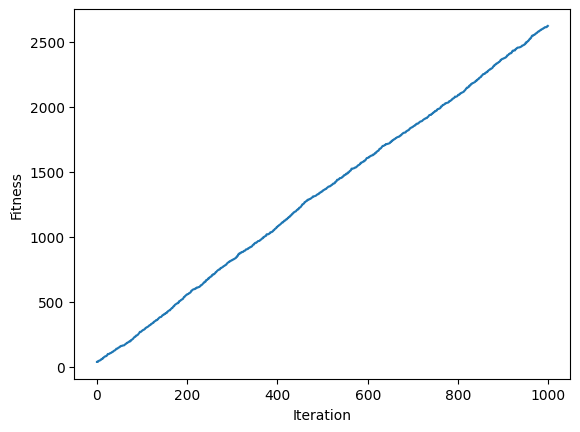

In [14]:
# Plot the fitness over generations
plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()